# Define classes of metabolites

In [1]:
from libchebipy._chebi_entity import ChebiEntity
import os
import json

import reframed
import pandas as pd
import numpy as np

import collections

In [2]:
import sys
sys.path.append('../functions/')

import general_functions as general_func

### Load models

In [3]:
directory = os.fsencode("../output/GEMs/GEMs_adapt_media_ACt2r/")

GEMs_dict = {}
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".xml"): 
        print(filename)
        GEMs_dict[filename[:-4]]= reframed.load_cbmodel("../output/GEMs/GEMs_adapt_media_ACt2r/"+filename)
        continue
    else:
        continue

CH7-bin.18.xml
CH15-bin.7.xml
CH13-bin.0.xml
CH1-bin.4.xml
CH13-bin.1.xml
CH13-bin.11.xml
CH15-bin.6.xml
CH7-bin.2.xml
CH13-bin.13.xml
CH1-bin.10.xml
CH1-bin.6.xml
CH13-bin.2.xml
CH13-bin.12.xml
CH15-bin.5.xml
CH7-bin.1.xml
CH15-bin.1.xml
CH1-bin.3.xml
CH13-bin.17.xml
CH15-bin.0.xml
CH7-bin.4.xml
CH7-bin.23.xml
CH7-bin.6.xml
CH15-bin.22.xml
CH15-bin.2.xml
CH1-bin.1.xml
CH13-bin.4.xml
CH13-bin.14.xml
CH15-bin.23.xml
CH7-bin.20.xml
CH8-bin.8.xml
CH8-bin.9.xml
CH8-bin.25.xml
CH14-bin.4.xml
CH14-bin.1.xml
CH8-bin.21.xml
CH14-bin.2.xml
CH8-bin.22.xml
CH8-bin.2.xml
CH8-bin.29.xml
CH8-bin.7.xml
CH8-bin.6.xml
CH3-bin.2.xml
CH8-bin.14.xml
CH8-bin.16.xml
CH3-bin.0.xml
CH8-bin.5.xml
CH3-bin.1.xml
CH8-bin.17.xml
CH7-bin.11.xml
CH9-bin.1.xml
CH15-bin.12.xml
CH13-bin.25.xml
CH15-bin.13.xml
CH9-bin.0.xml
CH7-bin.12.xml
CH9-bin.2.xml
CH7-bin.9.xml
CH15-bin.10.xml
CH7-bin.8.xml
CH7-bin.13.xml
CH7-bin.17.xml
CH15-bin.8.xml
CH15-bin.15.xml
CH7-bin.16.xml
CH9-bin.6.xml
CH9-bin.4.xml
CH15-bin.17.xml
CH1-bi

### Find the best way to map exchange to classes

#### Get Chebi ids associated with extracellular metabolites

In [4]:
chebi_ids = {}
chebi_frac = {}

all_mets_chebi =[] 
for key,model in GEMs_dict.items():
    
    ex_met = []
    chebi_ids[key]={}
    chebi_in_met = []
    for met in model.metabolites:

        if model.metabolites[met].compartment=="C_e":
            
            ex_met.append(met)
            if "chebi" in model.metabolites[met].metadata.keys():
                chebi_in_met.append(met)
                all_mets_chebi.append(met)
                chebi_ids[key][met]=model.metabolites[met].metadata["chebi"]
            else:
                chebi_ids[key][met]=None
    
    chebi_frac[key]=len(chebi_in_met)/len(ex_met)

In [5]:
pd.Series(chebi_frac).min()

0.6818181818181818

In [6]:
pd.Series(chebi_frac).mean()

0.7906957815792423

In [7]:
pd.Series(chebi_frac).max()

0.8896103896103896

In [8]:
len(set(all_mets_chebi))

362

**Find all chebi ids for the exchange reactions in all models (this also includes the ones that do not have chebi_id)**

In [9]:
super_dict = collections.defaultdict(set)
for d in chebi_ids.values():
    for k, v in d.items():  
        super_dict[k]=v

In [10]:
super_dict["M_but_e"]= ['CHEBI:17968']
super_dict["M_ppa_e"] = ['CHEBI:17272']
super_dict["M_14glucan_e"]= ['CHEBI:15444']

super_dict["M_2h3mp_e"] = ['CHEBI:133085']
super_dict["M_2mba_e"] = ['CHEBI:37070']

super_dict["M_2mpa_e"] = ['CHEBI:16135']

super_dict["M_3mba_e"] =['CHEBI:28484']

super_dict["M_4abzglu_e"] =['CHEBI:60903']

super_dict["M_4hpro_DC_e"] =['CHEBI:16231']

super_dict["M_val__D_e"] =['CHEBI:27477']
super_dict["M_tyr__D_e"] = ['CHEBI:28479']

super_dict["M_leu__D_e"] = ['CHEBI:28225']
super_dict["M_isocap_e"] = ['CHEBI:74903'] # Annotated as isocaproate, but has no charge 

In [11]:
all_mets = [met[2:-2] for met in super_dict.keys()]
len(all_mets)

508

#### Get KEGG ids associated with extracellular metabolites

In [12]:
kegg_frac = {}
all_mets_kegg = []
for key,model in GEMs_dict.items():
    
    ex_met = []
    kegg_in_met = []
    for met in model.metabolites:

        if model.metabolites[met].compartment=="C_e":
            ex_met.append(met)
            if "kegg.compound" in model.metabolites[met].metadata.keys():
                all_mets_kegg.append(met)
                kegg_in_met.append(met)
    
    kegg_frac[key]=len(kegg_in_met)/len(ex_met)

In [13]:
pd.Series(kegg_frac).min()

0.6190476190476191

In [14]:
pd.Series(kegg_frac).mean()

0.7536500663120338

In [15]:
pd.Series(kegg_frac).max()

0.8831168831168831

In [16]:
len(set(all_mets_kegg))

342

#### HMDB

In [17]:
HMDB_classes = pd.read_csv("../input/files_from_fairdomhub/bigg_classes.tsv",sep="\t")
HMDB_classes

,bigg,name,super_class,class,sub_class
0,thm,Thiamine,Organoheterocyclic compounds,Diazines,Pyrimidines and pyrimidine derivatives
1,26dap__M,"Meso-2,6-Diaminoheptanedioate",Organic acids and derivatives,Carboxylic acids and derivatives,"Amino acids, peptides, and analogues"
2,3cmp,3 CMP,"Nucleosides, nucleotides, and analogues",Ribonucleoside 3'-phosphates,Ribonucleoside 3'-phosphates
3,5mtr,5-Methylthio-D-ribose,Organooxygen compounds,Carbohydrates and carbohydrate conjugates,Sugar acids and derivatives
4,chols,Choline sulfate,Homogeneous non-metal compounds,Non-metal oxoanionic compounds,Non-metal sulfates
...,...,...,...,...,...
1611,xylnact__D,"D-Xylono-1,5-lactone",Organoheterocyclic compounds,Lactones,Delta valerolactones
1612,xylu__D,D-Xylulose,Organooxygen compounds,Carbohydrates and carbohydrate conjugates,Monosaccharides
1613,xylu__L,L-Threo-2-pentulose,Organic oxygen compounds,Organooxygen compounds,Carbohydrates and carbohydrate conjugates
1614,zeax,Zeaxanthin,Lipids and lipid-like molecules,Prenol lipids,Tetraterpenoids


In [18]:
HMDB_classes[HMDB_classes["bigg"].isin(all_mets)]

,bigg,name,super_class,class,sub_class
0,thm,Thiamine,Organoheterocyclic compounds,Diazines,Pyrimidines and pyrimidine derivatives
1,26dap__M,"Meso-2,6-Diaminoheptanedioate",Organic acids and derivatives,Carboxylic acids and derivatives,"Amino acids, peptides, and analogues"
2,3cmp,3 CMP,"Nucleosides, nucleotides, and analogues",Ribonucleoside 3'-phosphates,Ribonucleoside 3'-phosphates
4,chols,Choline sulfate,Homogeneous non-metal compounds,Non-metal oxoanionic compounds,Non-metal sulfates
5,citr__L,L-Citrulline,Organic acids and derivatives,Carboxylic acids and derivatives,"Amino acids, peptides, and analogues"
...,...,...,...,...,...
1606,xtsn,Xanthosine,"Nucleosides, nucleotides, and analogues",Purine nucleosides,NaN
1608,xyl__D,D-Xylose,Organic oxygen compounds,Organooxygen compounds,Carbohydrates and carbohydrate conjugates
1609,xyl__D,Aldehydo-D-xylose,Organic oxygen compounds,Organooxygen compounds,Carbohydrates and carbohydrate conjugates
1610,xylb,Xylobiose,Organic oxygen compounds,Organooxygen compounds,Carbohydrates and carbohydrate conjugates


In [19]:
HMDB_classes[HMDB_classes["bigg"].isin(all_mets)]["sub_class"].dropna().size

285

### Overlap

In [20]:
chebi_mets = set([met[2:-2] for met in all_mets_chebi])
kegg_mets = set([met[2:-2] for met in all_mets_kegg])
hmdb_mets = set(HMDB_classes[HMDB_classes["bigg"].isin(all_mets)].bigg.values)

In [21]:
import matplotlib_venn as venn

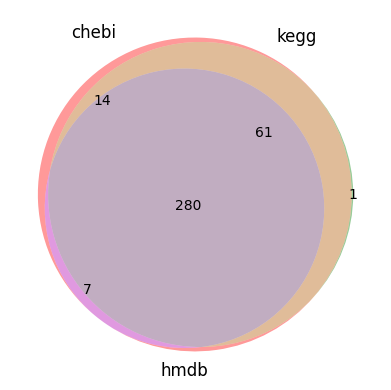

In [22]:
fig =venn.venn3([chebi_mets,kegg_mets,hmdb_mets],["chebi","kegg","hmdb"])

## Define substrate classes based on ChEBI

It's necessary to define some classes from CHEBI that we are interested in. 

Strategy:

- Define main classes. NB: Some compounds might fit into several classes
    - Define a hierarchy to avoid placing some compounds in a general class
    - Find the chebi class by recursively walking through the map.

In [23]:
really_large_classes = collections.OrderedDict({## Really Bigg classes
                "organonitrogen compounds":{
                    "CHEBI:35352":"organonitrogen compound"},
                "organosulfur compounds":{
                    "CHEBI:33261":"organosulfur compound"}, # from thiol CHEBI:29256
                "organophosphorus compounds":{
                    "CHEBI:25710":"organophosphorus compound"},
                "carboxylic acids and anions":{
                    "CHEBI:29067":"carboxylic acid anion",
                    "CHEBI:33575":"carboxylic acid"},
                "carbohydrate derivatives":{
                    "CHEBI:63299":"carbohydrate derivative"}
    })
large_classes = collections.OrderedDict({
                ## Bigg classes
                "alcohols and aldehydes":{
                    "CHEBI:15734": "primary alcohol",
                    "CHEBI:35681":"secondary alcohol",
                    "CHEBI:17478":"aldehyde"},

                "minerals and atoms":{
                    "CHEBI:24835":"inorganic ion",
                    "CHEBI:25585": "nonmetal atom"},
                "oligosaccharides":{
                    "CHEBI:50699":"oligosaccharide (undefined)"},
#                "lipid":{
#                    "CHEBI:18059":"lipid"
#                },
                "cofactors":{
                    "CHEBI:23357":"cofactor",
                    "CHEBI:33892":"iron coordination entity"}
                #"cofactors":{} #"CHEBI:5975":"iron chelate"
})
medium_classes = collections.OrderedDict({
                "aromatic compounds":{
                    "CHEBI:26195":"polyphenol"
                },
                "alkaloids":{
                    "CHEBI:22315":"alkaloid"
                },
                "polyamine":{
                    "CHEBI:88061":"polyamine"
                },
                "lipids":{
                    "CHEBI:16247":"phospholipid"},
                "steroid":{
                    "CHEBI:35341":"steroid"
                }
                
})

main_classes = collections.OrderedDict({
                "amino acids and derivatives":{
                    "CHEBI:37022":"amino-acid anion",
                    "CHEBI:33709":"amino acid",
                    "CHEBI:83821":"amino acid derivative"
},
                "oligopeptides":{                    
                    "CHEBI:25676":"oligopeptide"},
    
                "fatty acids":{
                    "CHEBI:58954":"straight-chain saturated fatty acid anion",
                    "CHEBI:58956":"branched-chain saturated fatty acid anion"},


                "carboxylic acids and anions":{
                    "CHEBI:33576":"sulfur-containing carboxylic acid"}, #From M_sulfac_e

                ## Carbohydrates
                "simple sugars":{
                    "CHEBI:35381":"monosaccharide",
                    "CHEBI:36233": "disaccharide"},
                "carbohydrate derivatives":{
                    "CHEBI:23639":"deoxy sugar",
                    "CHEBI:33720":"carbohydrate acid",# From M_galctn__L_e 
                },
                "oligosaccharides":{
                    "CHEBI:22590":"arabinan",
                    "CHEBI:37163":"glucan (undefined)"},
                "nucleotides and derivatives":{
                    "CHEBI:18282":"nucleobase", # From ura
                    "CHEBI:33838":"nucleoside",
                    "CHEBI:26401":"purines",
                    "CHEBI:39447":"pyrimidines",
                    "CHEBI:25608":"nucleoside phosphate"},
                    #"CHEBI:35241":"nucleotide-sugar",
                "B-vitamins":{
                   "CHEBI:75769": "B vitamin"},

                "other vitamins":{"CHEBI:12777":"vitamin A",
                                 "CHEBI:33234":"vitamin E",
                                 "CHEBI:27300":"vitamin D",
                                 "CHEBI:176783":"vitamin C",
                                 "CHEBI:28384":"vitamin K"},

                "gases":{
                    "CHEBI:138675":"gas molecular entity"},
                "urea and urea derivatives":{
                    "CHEBI:47857":"ureas",
                    "CHEBI:16199":"urea"},
    
                "aromatic compounds":{
                    "CHEBI:33853":"phenols",
                    "CHEBI:27338": "xylene",
                    "CHEBI:27024":"toluenes"}, # From M_tol_e
                "other":{
                    "CHEBI:26191":"polyol",
                    "CHEBI:23217": "cholines",
                    "CHEBI:24828": "indoles",
                    "CHEBI:26188":"polyketide"} # Based on ttrcyc

               })

**Recursive function to find first parent matching with main classes**

In [24]:
def find_main_class(chebi_id, main_classes):
    # If chebi_id is the id of a  main class -> return value
    if chebi_id in main_classes:
        return chebi_id  

    entity = ChebiEntity(chebi_id)
    parents = [rel.get_target_chebi_id() for rel in entity.get_outgoings() if rel.get_type() == "is_a"]
    
    # If we have reached the end of the graph
    if len(parents)==0:
        return None
    
    
    for parent in parents:
        result = find_main_class(parent, main_classes)  
        if result is not None:
            return result  

    return None

In [25]:
met_chebi_dict = {} # previously called main_class_dict

for main_class_dict_nested in [main_classes,medium_classes,large_classes,really_large_classes]:
    main_class_dict = collections.OrderedDict()
    for d in main_class_dict_nested.values():
        for k, v in d.items():  
            main_class_dict[k]=v
    
    for met_id,chebi_list in super_dict.items():
        if chebi_list is None:
            continue
        
        if met_id in met_chebi_dict.keys():
            continue

        for chebi_id in chebi_list:
            main_class = find_main_class(chebi_id,main_class_dict.keys())
            if main_class is not None:
                met_chebi_dict[met_id]=main_class
                break

#### Define class chebi ids for new metabolites

In [27]:
iIB746 = reframed.load_cbmodel("../input/curated_models/iIB746.xml") # Make sure that this is up to date!

In [28]:
xylo_gluc = [rxn for rxn in iIB746.get_exchange_reactions() if "Q" in rxn and rxn.split("_")[2].isupper()]
ara_xyl = [rxn for rxn in iIB746.get_exchange_reactions() if "A" in rxn and rxn.split("_")[2].isupper()]

cellulose = [rxn for rxn in iIB746.get_exchange_reactions() if "cell" in rxn]
cellulose.append("R_EX_cell6_e")

xylan = [rxn for rxn in iIB746.get_exchange_reactions() if "xyla" in rxn]

new_classes_rxns = {"CHEBI:18233":xylo_gluc,"CHEBI:28427":ara_xyl,"CHEBI:3523":cellulose,"CHEBI:60938":xylan}

new_classes = {"oligosaccharides":{"CHEBI:60938":"glucuronoxylan","CHEBI:28427":"arabinoxylan","CHEBI:18233":"xyloglucan","CHEBI:3523":"cellodextrin"}}

In [29]:
for chebi_id,rxns in new_classes_rxns.items():
    for rxn in rxns:
        met_id = rxn.replace("R_EX_","M_")
        met_id = met_id.replace("EX_","M_")
        met_chebi_dict[met_id]=chebi_id

In [30]:
len(met_chebi_dict.keys())

385

In [31]:
len(super_dict.keys())

508

In [32]:
len(super_dict.keys())-len(met_chebi_dict.keys())

123

In [33]:
set(super_dict.keys())-set(met_chebi_dict.keys())

{'M_23dhbzs3_e',
 'M_2m35mdntha_e',
 'M_35dnta_e',
 'M_3h4atb_e',
 'M_4hphac_e',
 'M_6atha_e',
 'M_LalaDgluMdapDala_e',
 'M_LalaDgluMdap_e',
 'M_R3hdec4e_e',
 'M_R_3hdcaa_e',
 'M_R_3hdda_e',
 'M_R_3hhdca_e',
 'M_R_3hocta_e',
 'M_R_3hpt_e',
 'M_R_3httdca_e',
 'M_abg4_e',
 'M_ala_L_glu__L_e',
 'M_ala_L_thr__L_e',
 'M_ala_gln_e',
 'M_ala_his_e',
 'M_ala_leu_e',
 'M_alagly_e',
 'M_alahis_e',
 'M_alaleu_e',
 'M_alathr_e',
 'M_alatrp_e',
 'M_algac__M_e',
 'M_anhgm_e',
 'M_apc_e',
 'M_araban__L_e',
 'M_aso4_e',
 'M_balaala_e',
 'M_balabala_e',
 'M_balagly_e',
 'M_balaleu_e',
 'M_balamd_e',
 'M_buts_e',
 'M_butso3_e',
 'M_carn_e',
 'M_chtbs_e',
 'M_cmcbtt_e',
 'M_cpgn_un_e',
 'M_cresol_e',
 'M_cyan_e',
 'M_d23hb_e',
 'M_dachi_e',
 'M_dca_e',
 'M_ddca_e',
 'M_diact_e',
 'M_dxylnt_e',
 'M_ecto__L_e',
 'M_fcmcbtt_e',
 'M_fe3dcit_e',
 'M_fe3dhbzs3_e',
 'M_fe3hox_un_e',
 'M_fe3mcbtt_e',
 'M_fe3pyovd_kt_e',
 'M_feoxam_un_e',
 'M_galman4_e',
 'M_galman6_e',
 'M_glcman4_e',
 'M_glcman6_e',
 'M_glucan4

**Coverage of all external metabolites in our model**

In [34]:
len(met_chebi_dict.keys())/len(super_dict.keys())

0.7578740157480315

#### Combine data as dataframe

**First we need a dict to map chebi id to class and the self defined super class**

In [35]:
chebi_classes = collections.defaultdict(set)

for class_dict in [medium_classes,large_classes,really_large_classes,main_classes,new_classes]:
    for met_super_class_name,sub_class_dict in class_dict.items():
        
        for chebi_id, chebi_class_name in sub_class_dict.items():  

            chebi_classes[chebi_id]={"chebi class":chebi_class_name,"self defined super class":met_super_class_name}

**Make a df for all the metabolites we were able to classify**

In [36]:
met_chebi_df = pd.DataFrame(met_chebi_dict.values(),index=met_chebi_dict.keys())
met_chebi_df.columns=["chebi id"]
met_chebi_df

,chebi id
M_12ppd__S_e,CHEBI:26191
M_26dap__M_e,CHEBI:33709
M_4abut_e,CHEBI:37022
M_acglu_e,CHEBI:83821
M_ala__L_e,CHEBI:33709
...,...
M_cell4_e,CHEBI:3523
M_cell3_e,CHEBI:3523
M_cell6_e,CHEBI:3523
M_xylan4_e,CHEBI:60938


**Combine data**

In [37]:
met_chebi_df["chebi class"]=met_chebi_df["chebi id"].map(lambda x:chebi_classes[x]["chebi class"])
met_chebi_df["self defined super class"]=met_chebi_df["chebi id"].map(lambda x:chebi_classes[x]["self defined super class"])

In [38]:
met_chebi_df

,chebi id,chebi class,self defined super class
M_12ppd__S_e,CHEBI:26191,polyol,other
M_26dap__M_e,CHEBI:33709,amino acid,amino acids and derivatives
M_4abut_e,CHEBI:37022,amino-acid anion,amino acids and derivatives
M_acglu_e,CHEBI:83821,amino acid derivative,amino acids and derivatives
M_ala__L_e,CHEBI:33709,amino acid,amino acids and derivatives
...,...,...,...
M_cell4_e,CHEBI:3523,cellodextrin,oligosaccharides
M_cell3_e,CHEBI:3523,cellodextrin,oligosaccharides
M_cell6_e,CHEBI:3523,cellodextrin,oligosaccharides
M_xylan4_e,CHEBI:60938,glucuronoxylan,oligosaccharides


In [39]:
len(met_chebi_df["self defined super class"].unique())

23

In [40]:
met_chebi_df["self defined super class"].value_counts()

self defined super class
amino acids and derivatives    51
nucleotides and derivatives    46
carboxylic acids and anions    41
carbohydrate derivatives       41
minerals and atoms             33
oligosaccharides               28
simple sugars                  22
other                          20
alcohols and aldehydes         17
organophosphorus compounds     11
oligopeptides                  11
aromatic compounds             11
organosulfur compounds         10
gases                           8
fatty acids                     7
cofactors                       6
organonitrogen compounds        6
B-vitamins                      5
polyamine                       3
lipids                          3
urea and urea derivatives       3
other vitamins                  1
steroid                         1
Name: count, dtype: int64

In [41]:
met_chebi_df[met_chebi_df["self defined super class"]=="carboxylic acids and anions"]

,chebi id,chebi class,self defined super class
M_lipoate_e,CHEBI:33576,sulfur-containing carboxylic acid,carboxylic acids and anions
M_sula_e,CHEBI:33576,sulfur-containing carboxylic acid,carboxylic acids and anions
M_sulfac_e,CHEBI:33576,sulfur-containing carboxylic acid,carboxylic acids and anions
M_ac_e,CHEBI:29067,carboxylic acid anion,carboxylic acids and anions
M_acac_e,CHEBI:29067,carboxylic acid anion,carboxylic acids and anions
M_bz_e,CHEBI:29067,carboxylic acid anion,carboxylic acids and anions
M_cit_e,CHEBI:29067,carboxylic acid anion,carboxylic acids and anions
M_for_e,CHEBI:29067,carboxylic acid anion,carboxylic acids and anions
M_hdca_e,CHEBI:33575,carboxylic acid,carboxylic acids and anions
M_lac__D_e,CHEBI:29067,carboxylic acid anion,carboxylic acids and anions


In [42]:
met_chebi_df[met_chebi_df["self defined super class"]=="fatty acids"]

,chebi id,chebi class,self defined super class
M_hxa_e,CHEBI:58954,straight-chain saturated fatty acid anion,fatty acids
M_ocdca_e,CHEBI:58954,straight-chain saturated fatty acid anion,fatty acids
M_octa_e,CHEBI:58954,straight-chain saturated fatty acid anion,fatty acids
M_pta_e,CHEBI:58954,straight-chain saturated fatty acid anion,fatty acids
M_ibt_e,CHEBI:58956,branched-chain saturated fatty acid anion,fatty acids
M_3mb_e,CHEBI:58956,branched-chain saturated fatty acid anion,fatty acids
M_nona_e,CHEBI:58954,straight-chain saturated fatty acid anion,fatty acids


In [43]:
met_chebi_df[met_chebi_df["self defined super class"]=="amino acids and derivatives"]

,chebi id,chebi class,self defined super class
M_26dap__M_e,CHEBI:33709,amino acid,amino acids and derivatives
M_4abut_e,CHEBI:37022,amino-acid anion,amino acids and derivatives
M_acglu_e,CHEBI:83821,amino acid derivative,amino acids and derivatives
M_ala__L_e,CHEBI:33709,amino acid,amino acids and derivatives
M_arg__L_e,CHEBI:33709,amino acid,amino acids and derivatives
M_asn__L_e,CHEBI:33709,amino acid,amino acids and derivatives
M_asp__L_e,CHEBI:37022,amino-acid anion,amino acids and derivatives
M_cys__L_e,CHEBI:33709,amino acid,amino acids and derivatives
M_gln__L_e,CHEBI:33709,amino acid,amino acids and derivatives
M_glu__L_e,CHEBI:37022,amino-acid anion,amino acids and derivatives


In [44]:
met_chebi_df[met_chebi_df["self defined super class"]=="other"]

,chebi id,chebi class,self defined super class
M_12ppd__S_e,CHEBI:26191,polyol,other
M_cm_e,CHEBI:26191,polyol,other
M_doxrbcn_e,CHEBI:26188,polyketide,other
M_indole_e,CHEBI:24828,indoles,other
M_mnl_e,CHEBI:26191,polyol,other
M_ttrcyc_e,CHEBI:26188,polyketide,other
M_abt_e,CHEBI:26191,polyol,other
M_chol_e,CHEBI:23217,cholines,other
M_g3pc_e,CHEBI:23217,cholines,other
M_glyc_e,CHEBI:26191,polyol,other


**The selected compounds used here cover most of the interesting compounds**

In [45]:
selected_compounds = general_func.chebi_selected(rxn_based=False)["self defined super class"].unique()

In [46]:
met_chebi_df[~met_chebi_df["self defined super class"].isin(selected_compounds)].groupby("self defined super class").count()

,chebi id,chebi class
self defined super class,,
aromatic compounds,11,11
minerals and atoms,33,33
organonitrogen compounds,6,6
organophosphorus compounds,11,11
organosulfur compounds,10,10
other,20,20
other vitamins,1,1
polyamine,3,3
steroid,1,1


### Save data

In [47]:
met_chebi_df.to_csv("../output/met_chebi_class.tsv",sep="\t")